In [1]:
from google.colab import files
uploaded = files.upload()



Saving shopping_trends.csv to shopping_trends.csv


In [5]:
import pandas as pd

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/ShoppingTrends/shopping_trends_updated.csv')

In [6]:
data.head()


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [7]:
!pip install matplotlib seaborn


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


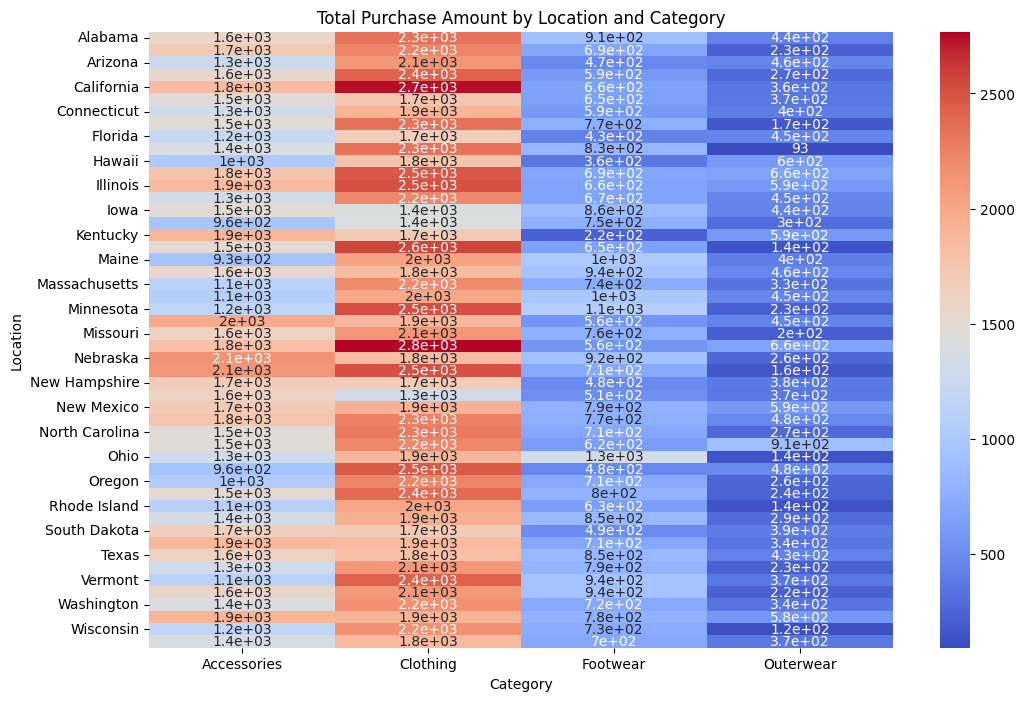

In [9]:
# Pivot table for heatmap
pivot_table = data.pivot_table(values='Purchase Amount (USD)',
                               index='Location',
                               columns='Category',
                               aggfunc='sum',
                               fill_value=0)

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True)
plt.title('Total Purchase Amount by Location and Category')
plt.savefig('purchase_amount_heatmap.png')
plt.show()


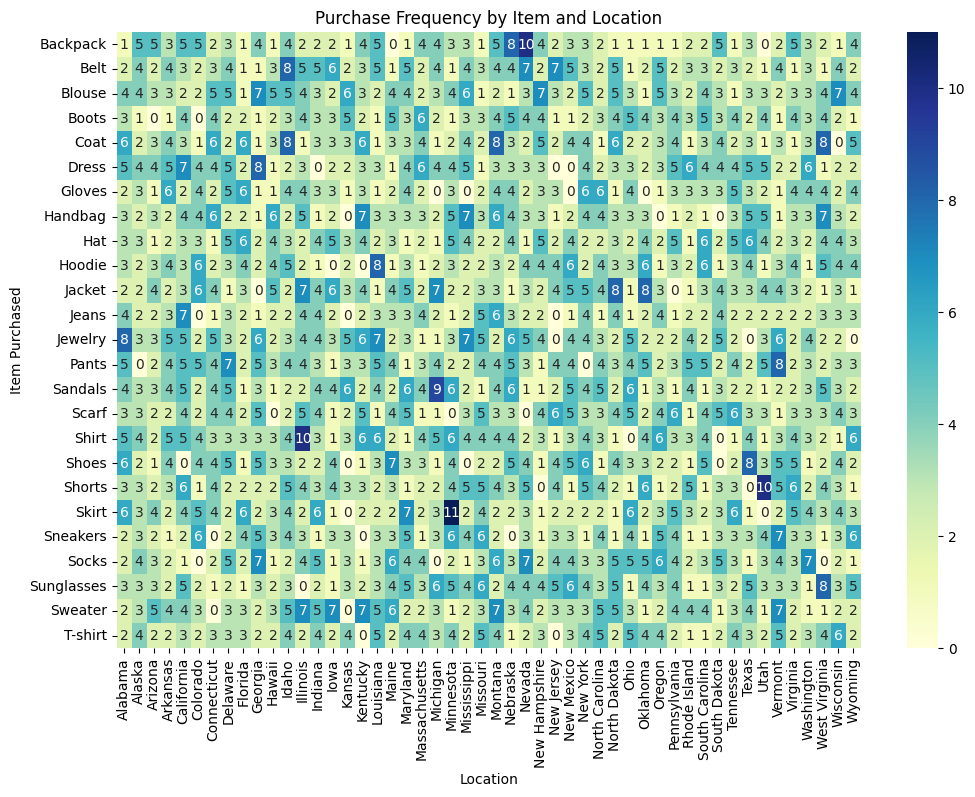

In [10]:
# Pivot table for heatmap
pivot_table = data.pivot_table(values='Customer ID',
                               index='Item Purchased',
                               columns='Location',
                               aggfunc='count',
                               fill_value=0)

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True)
plt.title('Purchase Frequency by Item and Location')
plt.savefig('purchase_frequency_heatmap.png')
plt.show()


In [15]:
!pip install folium geopandas


In [16]:
import pandas as pd
import folium
from folium.plugins import HeatMap


In [21]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import time

# Initialize geolocator
geolocator = Nominatim(user_agent="my_app_v1.0")

def geocode_address(address):
    try:
        location = geolocator.geocode(address, timeout=10)
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except GeocoderTimedOut:
        time.sleep(1)
        return geocode_address(address)

# Load your dataset
data = pd.read_csv('/content/drive/MyDrive/ShoppingTrends/shopping_trends_updated.csv')

# Apply geocoding
data[['Latitude', 'Longitude']] = data['Location'].apply(geocode_address).apply(pd.Series)

# Save the updated dataset
data.to_csv('geocoded_dataset.csv', index=False)


In [22]:
import pandas as pd

# Load the geocoded dataset
data = pd.read_csv('geocoded_dataset.csv')


In [23]:
!pip install folium seaborn matplotlib


In [24]:
import folium
from folium.plugins import HeatMap

# Initialize a map centered around the mean location
map_center = [data['Latitude'].mean(), data['Longitude'].mean()]
map_object = folium.Map(location=map_center, zoom_start=5)

# Prepare the data for the heatmap
heat_data = [[row['Latitude'], row['Longitude']] for index, row in data.iterrows()]

# Add the heatmap layer to the map
HeatMap(heat_data).add_to(map_object)

# Save or display the map
map_object.save('customer_heatmap.html')
map_object
